# Análise exploratória de dados da Olist
Neste projeto, realizarei uma análise exploratória de dados no conjunto de dados Olist do Kaggle. Algumas questões/hipóteses de negócio serão formuladas e tentarei respondê-las.

Sobre o conjunto de dados:

Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas características permitem visualizar um pedido a partir de várias dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, análises escritas pelos clientes. Também foi lançado um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros a coordenadas de latitude/longitude.

Contexto:

Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos nos marketplaces brasileiros. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente para os clientes usando os parceiros logísticos da Olist. Saiba mais em seu site: www.olist.com

Após um cliente comprar o produto da Olist Store, um vendedor é notificado para atender ao pedido. Assim que o cliente recebe o produto, ou a data de entrega estimada expira, o cliente recebe uma pesquisa de satisfação por e-mail, onde pode atribuir uma nota para a experiência de compra e escrever alguns comentários.

### Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (pedidos e valor médio)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais os horários / dias da semana / meses do ano são feitas mais e menos compras?
8. Como se dá a evolução das compras ao longo do tempo?
9. Quais as categorias de item mais vendidas por região?
10. A região do país afeta o número de parcelas escolhido?
11. Em que estados estão concentrados mais e menos clientes?
12. Qual o número médio de itens por pedido?

### 0.0 Importando as bibliotecas

In [1]:
# Visualização e manipulação de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

### 1.0 Coletando os dados

In [2]:
customers_path = '../Olist/input/olist_customers_dataset.csv'
geolocation_path = '../Olist/input/olist_geolocation_dataset.csv'
items_path = '../Olist/input/olist_order_items_dataset.csv'
payments_path = '../Olist/input/olist_order_payments_dataset.csv'
reviews_path = '../Olist/input/olist_order_reviews_dataset.csv'
orders_path = '../Olist/input/olist_orders_dataset.csv'
products_path = '../Olist/input/olist_products_dataset.csv'
sellers_path = '../Olist/input/olist_sellers_dataset.csv'
category_path = '../Olist/input/product_category_name_translation.csv'

customers = pd.read_csv(customers_path)
geolocation = pd.read_csv(geolocation_path)
items = pd.read_csv(items_path)
payments = pd.read_csv(payments_path)
reviews = pd.read_csv(reviews_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)
sellers = pd.read_csv(sellers_path)
category = pd.read_csv(category_path)

### 1.1 Schema do banco de dados
<img src="reports/schemaOlist.png" height=500>

### 1.2 Unindo os dados em diversas tabela
- Abaixo, unirei os dados em tabelas contendo informação completa acerca de determinado elemento, como por exemplo, pedidos.

### 1.3 Customers data
- customer_id é um id gerado cada vez que o cliente faz um pedido.
- customer_unique_id é um id que identifica individualmente cada cliente, atribuído no cadastro.
- Customers e geolocation são unidos através da chave zip_code_prefix.
- Nota-se que Customers tem 100.000 linhas, enquanto geolocation tem 1.000.000 de linhas e zipcodes duplicados. Isso indica que um zipcode possui várias localizações de latitude e longitude. Estratégia: Agrupar os zipcodes, obtendo a média/centroide de latitude e longitude.
- Selecionarei apenas as colunas de latitude e longitude pois cidade e estado do cliente já estão presentes no dataset customers.

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geolocation_grouped = geolocation.groupby(['geolocation_zip_code_prefix'])[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
customer_data = pd.merge(left=customers, right=geolocation_grouped, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['geolocation_zip_code_prefix', 'customer_zip_code_prefix'])
customer_data.head()

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.975100,-47.142925


#### 1.4 Item data
- Irei agora unir os datasets orders e items. Então, irei uni-lo com customers, a fim de obter um dataset completo com informações de pedidos.
- Um pedido pode conter múltiplos itens. Portanto, no dataset items, o order_id contém duplicados, indicando múltiplos itens de um mesmo pedido.
- Das colunas contendo informação temporal, selecionarei apenas a que indica a data e horário do pedido, pois é a que será interessante para a análise. Poderemos investigar, por exemplo, em quais datas ocorreram maiores vendas e etc.
- Aqui, eu desejo obter uma visão do id do pedido, qual cliente pediu (customer_unique_id), qual foi a data do pedido, e qual foi o preço, por exemplo.

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
items['order_id'].duplicated().sum()

13984

In [9]:
orders.shape, items.shape

((99441, 8), (112650, 7))

In [10]:
item_data = pd.merge(left=orders, right=items, on='order_id', how='inner').drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'seller_id', 'order_status'])
item_data = pd.merge(left=item_data, right=customers, how='inner', on='customer_id').drop(columns=['customer_id', 'customer_zip_code_prefix'])
item_data

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,da62f9e57a76d978d02ab5362c509660,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1,b80910977a37536adeddd63663f916ad,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


### 1.5 Product data
- Considerando que eu já possuo um dataset com dados sobre o pedido realizado (como a data e os custos), o cliente que fez o pedido e os itens pedidos, agora irei obter a categoria do produto com base na chave "product_id".

In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_data = pd.merge(left=item_data, right=products, on='product_id', how='inner').drop(columns=[x for x in products.columns if x not in set(['product_id', 'product_category_name'])])

In [13]:
product_data.head()

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria


### 1.6 Payment data
- Em um mesmo pedido, podemos ter vários itens. Payments fornece dados de pagamento para cada item. Os itens podem ser parcelados em diferentes números de parcelas, formando uma sequência, e podem ser pagos de diferentes formas em um mesmo pedido.
- Considerando que o pagamento com cartão de crédito representa 75% dos pedidos, enquanto os outros 25% estão distribuídos nas outras categorias, irei ignorar as colunas payment_type e payment_sequential.
- Agruparei por order_id e somarei as parcelas e o valor, obtendo, para cada pedido, o número total de parcelas e o valor total pago.

In [14]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
payments_grouped = payments.groupby(['order_id'])[['payment_installments', 'payment_value']].sum().reset_index()
pmt_data = pd.merge(left=product_data, right=payments_grouped, on='order_id', how='left')
pmt_data

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas,3.0,38.71
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas,3.0,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas,1.0,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas,1.0,44.09
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria,1.0,141.46
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,SP,esporte_lazer,10.0,748.24
112646,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,SP,esporte_lazer,10.0,748.24
112647,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:41,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,PR,instrumentos_musicais,1.0,71.04
112648,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,beleza_saude,3.0,85.08


### 1.7 Seller data
- Pode ser interessante para a análise obter, para cada pedido, o vendedor, sua localização, data de envio e entrega, e o cliente, também localizado.

In [16]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
sellers.shape

(3095, 4)

In [18]:
sellers_geoloc = pd.merge(left=sellers, right=geolocation_grouped, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['seller_zip_code_prefix', 'geolocation_zip_code_prefix'])
sellers_orders_geoloc = pd.merge(left=items, right=sellers_geoloc, on='seller_id', how='left').drop(columns=['order_item_id', 'product_id', 'price', 'freight_value'])
sellers_orders_geoloc = pd.merge(left=sellers_orders_geoloc, right=orders, on='order_id', how='inner').drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date'])
seller_data = pd.merge(left=sellers_orders_geoloc, right=customer_data, on='customer_id', how='inner').drop(columns=['customer_id']).rename(columns={'geolocation_lat_x': 'seller_lat', 'geolocation_lng_x': 'seller_lng', 'geolocation_lat_y': 'customer_lat', 'geolocation_lng_y': 'customer_lng'})
seller_data.head()

,order_id,seller_id,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,borda da mata,MG,-22.262584,-46.171124,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,franca,SP,-20.553624,-47.387359,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,loanda,PR,-22.929384,-53.135873,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,-23.243402,-46.827614


### 1.8 Order data
- Aqui, obterei um dataset semelhante ao de itens - item_data. Entretanto, meu objetivo consiste em prover informações para um order_id único, de forma que eu possa responder as perguntas de negócio.

In [19]:
order_data = pd.merge(left=orders, right=customer_data, on='customer_id', how='left').drop(columns=['customer_id', 'geolocation_lat', 'geolocation_lng', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_status'])
order_data = pd.merge(left=order_data, right=payments_grouped, on='order_id', how='left')
order_data

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,3.0,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,3.0,195.00
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,5.0,271.01
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,4.0,441.16


### 2.0 Entendimento inicial dos dados
- De posse dos conjuntos de dados, agora iremos realizar uma exploração inicial, acessando estatísticas descritivas, valores nulos e duplicados, realizando limpezas e etc.
- A análise ocorrerá principalmente em dois datasets que obtive acima. O dataset de pedidos e o de itens.
- Me guiarei pelas perguntas de negócio realizadas.

In [20]:
order_data.head()

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62


In [21]:
item_data.head()

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [22]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99441 non-null  object 
 1   order_purchase_timestamp  99441 non-null  object 
 2   customer_unique_id        99441 non-null  object 
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   payment_installments      99440 non-null  float64
 6   payment_value             99440 non-null  float64
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


In [23]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_purchase_timestamp  112650 non-null  object 
 2   order_item_id             112650 non-null  int64  
 3   product_id                112650 non-null  object 
 4   price                     112650 non-null  float64
 5   freight_value             112650 non-null  float64
 6   customer_unique_id        112650 non-null  object 
 7   customer_city             112650 non-null  object 
 8   customer_state            112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.7+ MB


A variável referente à data de compra está no formato incorreto (object), vamos convertê-la para datetime.

In [24]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
item_data['order_purchase_timestamp'] = pd.to_datetime(item_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

Verificando valores nulos e duplicados.

In [25]:
order_data.isna().sum()

order_id                    0
order_purchase_timestamp    0
customer_unique_id          0
customer_city               0
customer_state              0
payment_installments        1
payment_value               1
dtype: int64

In [26]:
item_data.isna().sum()

order_id                    0
order_purchase_timestamp    0
order_item_id               0
product_id                  0
price                       0
freight_value               0
customer_unique_id          0
customer_city               0
customer_state              0
dtype: int64

Há apenas um valor nulo em installments e value no dataset de orders, os quais serão removidos.

In [27]:
order_data.dropna(inplace=True)

Vamos checar os domínios das variáveis categóricas. Como elas são as mesmas em ambos os dataframes, basta olhar as de um deles. Quero aqui, atentar-me para cardinalidade e possíveis tarefas de limpeza necessárias, quando categorias estão erradas ou repetidas, por exemplo.

In [28]:
categorical_features = [x for x in item_data.select_dtypes('object').columns.tolist() if 'id' not in x]
print(f'As variáveis categóricas são: {categorical_features}.')

As variáveis categóricas são: ['customer_city', 'customer_state'].


In [29]:
for feature in categorical_features:
    print(feature)
    print(f'Há {item_data[feature].nunique()} categorias: {item_data[feature].unique()}', end='\n')

customer_city
Há 4110 categorias: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
customer_state
Há 27 categorias: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']


In [30]:
cities = item_data.customer_city.unique().tolist()
print(cities)

['sao paulo', 'barreiras', 'vianopolis', 'sao goncalo do amarante', 'santo andre', 'congonhinhas', 'santa rosa', 'nilopolis', 'faxinalzinho', 'sorocaba', 'rio de janeiro', 'ouro preto', 'goiania', 'imbituba', 'hortolandia', 'feira de santana', 'blumenau', 'salvador', 'sao carlos', 'boa vista', 'palmares', 'mesquita', "santa barbara d'oeste", 'alvorada', 'ibiapina', 'quata', 'jaboatao dos guararapes', 'paracambi', 'presidente venceslau', 'brasilia', 'luis eduardo magalhaes', 'jundiai', 'cruz das almas', 'sao jose dos campos', 'flores da cunha', 'carapicuiba', 'paranavai', 'porto alegre', 'duque de caxias', 'taubate', 'aracaju', 'campinas', 'uberaba', 'juiz de fora', 'boninal', 'uberlandia', 'cosmopolis', 'joinville', 'paulinia', 'bom jardim de minas', 'cascavel', 'cuiaba', 'ribeirao preto', 'portao', 'poa', 'belo horizonte', 'gravatai', 'santa luzia', 'antonio cardoso', 'tapiratiba', 'irineopolis', 'jequitai', 'palmas', 'presidente kubitschek', 'itajai', 'alto santo', 'flor da serra do 

É possível ver que há algumas categorias com domínios repetidos de formas diferentes, como "São Paulo" e "SP". Iremos lidar com isso posteriormente.

### 3.0 Análise exploratória de dados
- Aqui iremos responder as perguntas de negócio e obter insights, realizando análises univariada, bivariada e multivariada dos dados.
- As perguntas de negócio guiarão a análise.

### 3.1 Análise univariada

### 3.2 Qual o preço médio dos itens comprados?

In [31]:
item_data['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

- O preço médio dos itens é de aproximadamente 120 reais. 
- Esse valor pode variar bastante, com um desvio padrão de 183 e analisando os valores máximo e mínimo.
- Considerando que a média é maior que a mediana, pode-se inferir que os preços possuem uma distribuição assimétrica à direita, contendo outliers. Vamos visualizar isso abaixo.
- Analisando o IQR, 50% dos preços estão entre 40 reais e 135 reais.

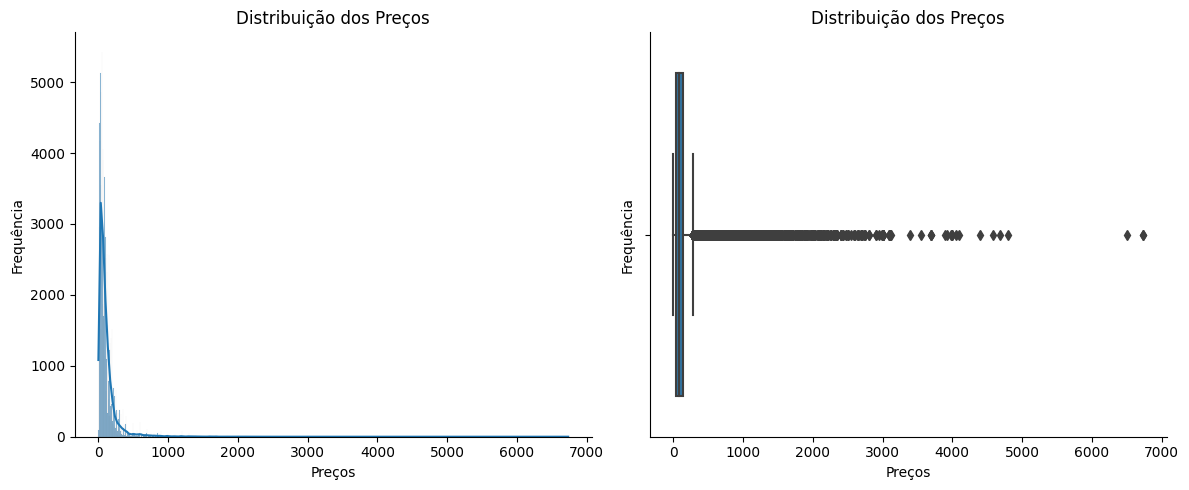

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=item_data, x='price', kde=True, ax=axes[0])
axes[0].set_title('Distribuição dos Preços')
axes[0].set_xlabel('Preços')
axes[0].set_ylabel('Frequência')

sns.boxplot(data=item_data, x='price', ax=axes[1])
axes[1].set_title('Distribuição dos Preços')
axes[1].set_xlabel('Preços')
axes[1].set_ylabel('Frequência')

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como é possível ver, os preços levam uma distribuição assimétrica à direita, com vários outliers. Especialmente, há outliers com preços além de 6000 reais bem distantes dos outros, vamos investigá-los abaixo.

In [33]:
item_data.loc[item_data['price'] > 6000]

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state
3925,f5136e38d1a14a4dbd87dff67da82701,2017-05-24 18:14:34,1,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66,ff4159b92c40ebe40454e3e6a7c35ed6,marilia,SP
25071,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:37:36,1,489ae2aa008f021502940f251d4cce7f,6735.0,194.31,dc4802a71eae9be1dd28f5d788ceb526,campo grande,MS
32077,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:17,1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21,459bef486812aa25204be022145caa62,vitoria,ES


Como não tenho certeza se são dados incoerentes, e é plenamente possível existirem produtos com esse preço, irei deixá-los.

### 3.3 Qual o valor médio pago por pedido?

In [34]:
order_data['payment_value'].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

- O valor médio pago por pedido é de aproximadamente 161 reais.
- Esse valor pode variar bastante, com um desvio padrão de 222. 
- O valor pago deve seguir uma distribuição assimétrica à direita, considerando que a média é maior que a mediana e observando os valores mínimo e máximo. 
- Pedidos com valor pago igual a zero podem representar compras canceladas, portanto, irei removê-los. São apenas 3 observações, portanto, as medidas de interesse aqui não serão afetadas.
- Considerando o IQR, 50% dos valores pagos em pedidos estão entre 62 reais e 177 reais.

In [35]:
pmt_zero = order_data.loc[order_data['payment_value'] == 0].index
order_data.drop(pmt_zero, inplace=True)

In [36]:
order_data['payment_value'].describe()

count    99437.000000
mean       160.995124
std        221.952843
min          9.590000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

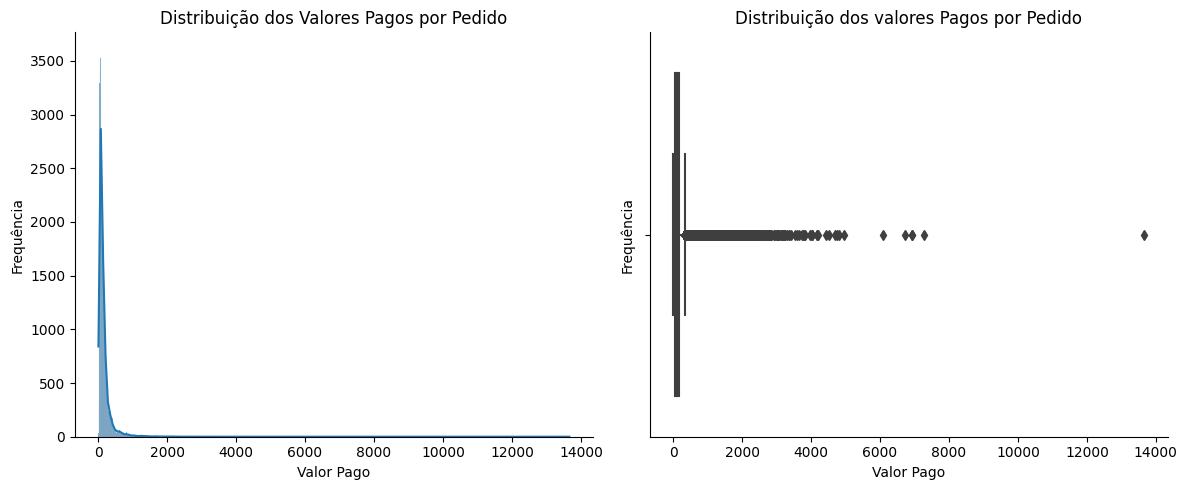

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=order_data, x='payment_value', kde=True, ax=axes[0])
axes[0].set_title('Distribuição dos Valores Pagos por Pedido')
axes[0].set_xlabel('Valor Pago')
axes[0].set_ylabel('Frequência')

sns.boxplot(data=order_data, x='payment_value', ax=axes[1])
axes[1].set_title('Distribuição dos valores Pagos por Pedido')
axes[1].set_xlabel('Valor Pago')
axes[1].set_ylabel('Frequência')

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como esperado, temos assimetria. Aparentemente, há um outlier que se distancia muito dos demais, vamos investigar.

In [38]:
order_data.loc[order_data['payment_value'] > 10000]

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
13390,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1.0,13664.08


In [39]:
item_data.loc[item_data['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state
15070,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,1,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15071,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,2,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15072,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,3,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15073,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,4,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15074,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15075,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,6,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15076,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,7,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ
15077,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,8,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ


Aparentemente este outlier não representa informação inconsistente, apenas um cliente que fez uma série de pedidos caros de uma vez no Rio de Janeiro. Portanto, não deve ser retirado da análise. Sendo um ponto isolado dentre tantas observações, ele não irá distorcer nossas medidas de interesse.

### 3.4 Em quantas parcelas, em média, os pedidos são parcelados?

In [40]:
order_data['payment_installments'].describe()

count    99437.000000
mean         2.980983
std          2.741830
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         29.000000
Name: payment_installments, dtype: float64

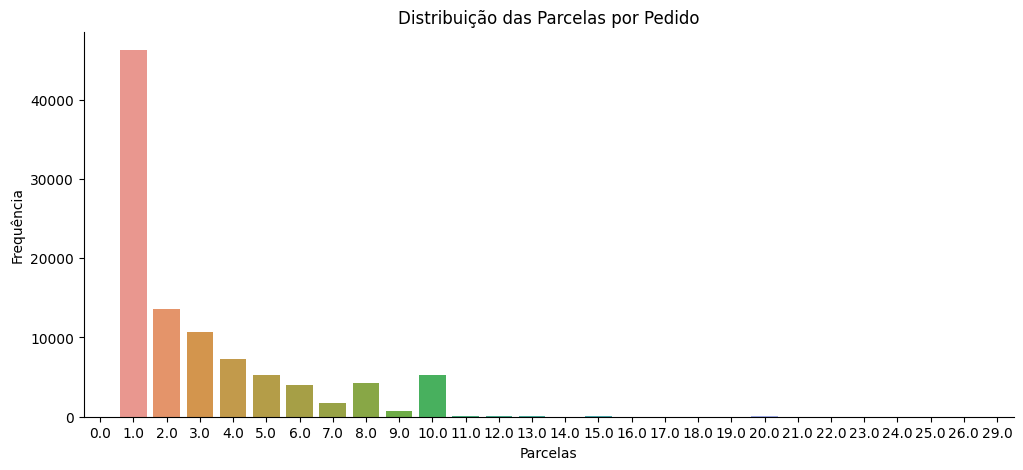

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(data=order_data, x='payment_installments')
ax.set_title('Distribuição das Parcelas por Pedido')
ax.set_xlabel('Parcelas')
ax.set_ylabel('Frequência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


- Os pagamentos são parcelados, em média, em aproximadamente 3 parcelas.
- Esse valor pode variar, com um desvio padrão de 2.74. Ademais, observando os valores mínimo e máximo, pode-se inferir que a média é afetada por outliers - pagamentos divididos em até 29 parcelas, por exemplo.
- Analisando o IQR, 50% dos clientes parcelam de 1 a 4 vezes o pagamento.

### 3.5 Análise bivariada

### 3.6 Quais estados vendem mais?

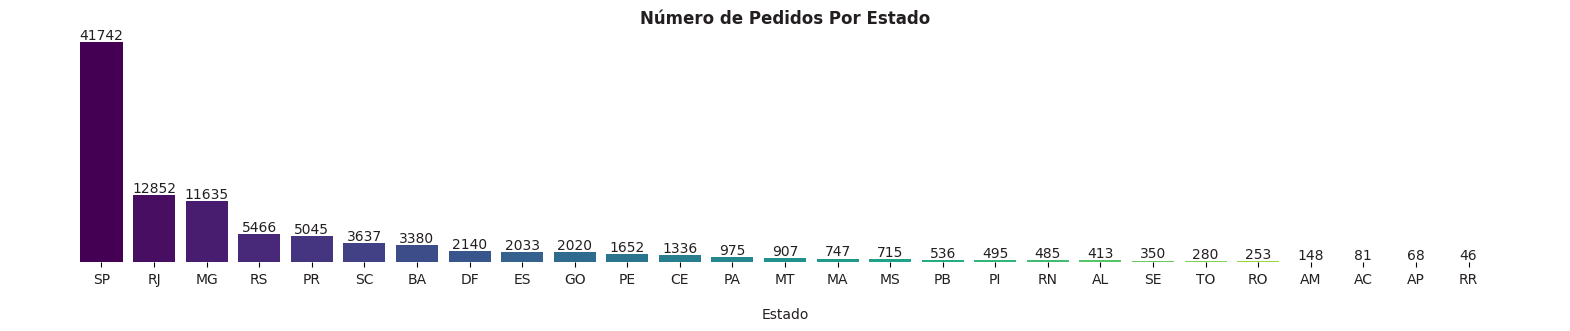

In [42]:
states_orders = order_data.groupby(['customer_state'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'],ascending=False).reset_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(states_orders)))
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_orders['customer_state'], height=states_orders['orders'], color=colors)
ax.bar_label(bars, color=CINZA1)
ax.set_title('Número de Pedidos Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_orders['customer_state'], labels=states_orders['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Os estados do sul e sudeste lideram as vendas da Olist, com destaque para São Paulo, vendendo 3.25 vezes mais que o segundo maior vendedor (RJ) e 11.3 vezes mais que a média. Logo em seguida, temos a Bahia e o DF.

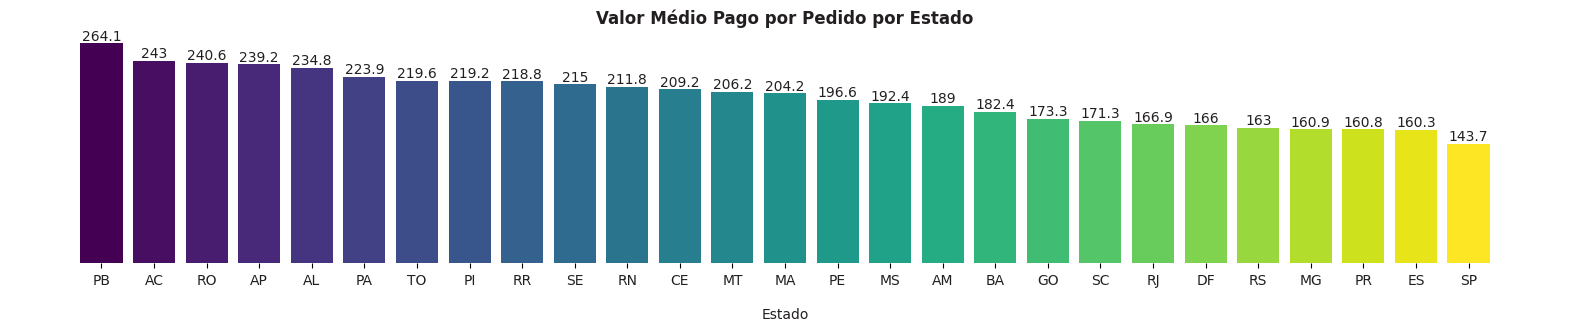

In [119]:
states_pmt = order_data.groupby(['customer_state'])[['payment_value']].mean().sort_values(by=['payment_value'], ascending=False).reset_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(states_pmt)))
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_pmt['customer_state'], height=round(states_pmt['payment_value'], 1), color=colors)
ax.bar_label(bars, color=CINZA1)
ax.set_title('Valor Médio Pago por Pedido por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_pmt['customer_state'], labels=states_pmt['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Estados do norte e nordeste possuem os maiores valores pagos em média por pedido. Curiosamente, São Paulo aparece em último lugar. Provavelmente porque a maioria dos pedidos é feita lá, e estes estão concentrados em valores menores, como visto na distribuição dos preços.

### 3.7 Quais as categorias de item mais vendidas?

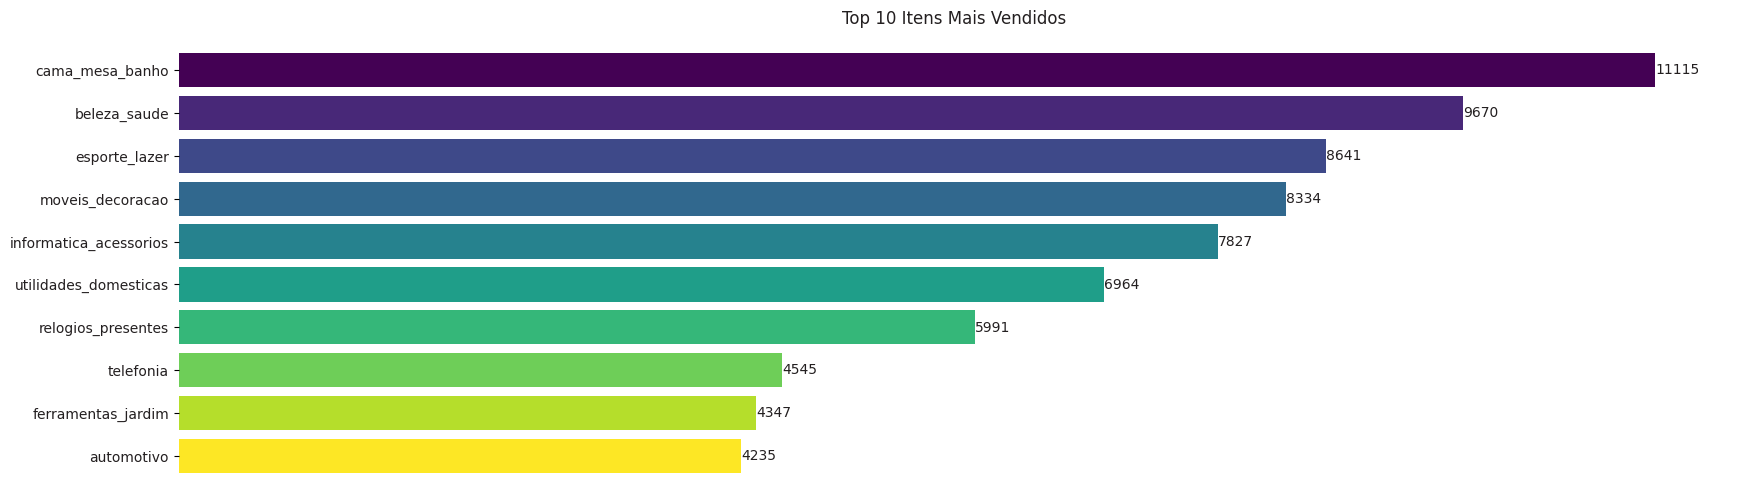

In [91]:
category_items = product_data.groupby(['product_category_name'])[['product_id']].count().rename(columns={'product_id': 'items'}).sort_values(by=['items'], ascending=False).reset_index().head(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(category_items)))
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=category_items['product_category_name'], width=category_items['items'], color=colors)
ax.bar_label(bars, color=CINZA1)
ax.set_title('Top 10 Itens Mais Vendidos', color=CINZA1)
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=category_items['product_category_name'], labels=category_items['product_category_name'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Acima podemos ver os produtos mais vendidos. Algo que me chama atenção é o fato de ferramentas_jardim estar dentro do top10. É possível notar que realmente, a Olist engloba vendedores das mais diversas categorias de produtos.

### 3.8 Quais cidades vendem mais?

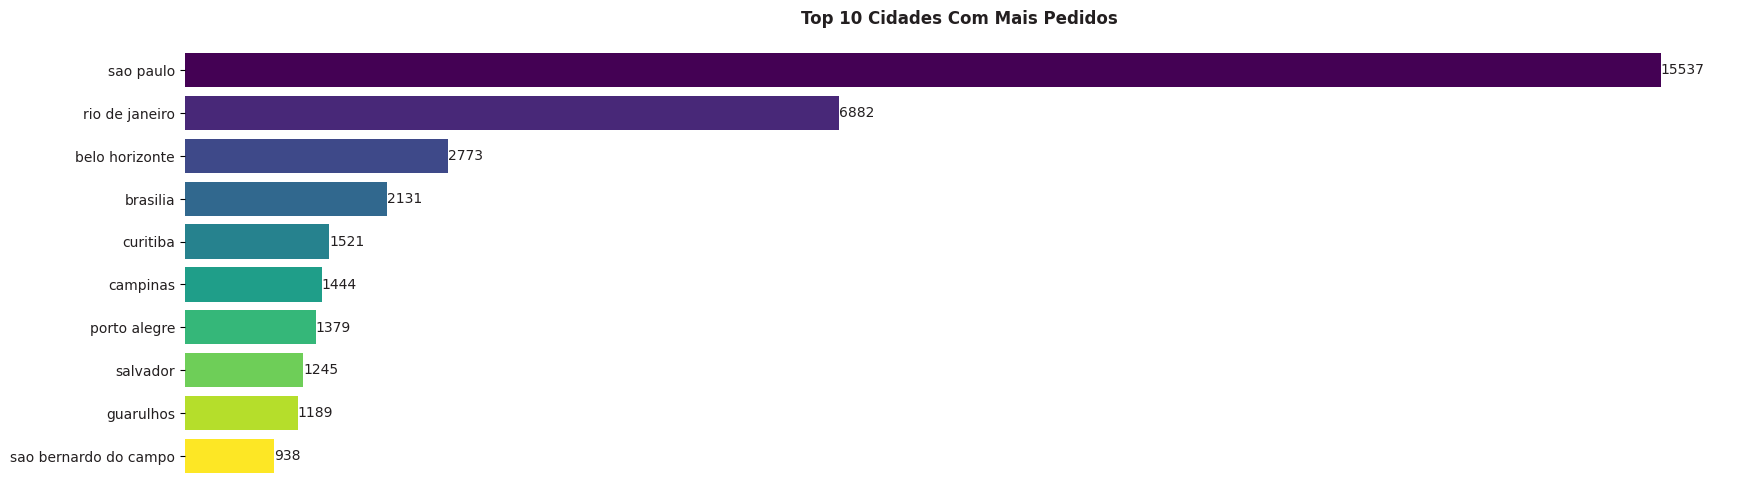

In [90]:
cities_orders = order_data.groupby(['customer_city'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'], ascending=False).reset_index().head(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(cities_orders)))
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=cities_orders['customer_city'], width=cities_orders['orders'], color=colors)
ax.bar_label(bars, color=CINZA1)
ax.set_title('Top 10 Cidades Com Mais Pedidos', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=cities_orders['customer_city'], labels=cities_orders['customer_city'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Como esperado, São Paulo representa, de longe, a cidade com maior número de pedidos, possuindo um número 4.4 vezes maior que a média das dez acima. Brasília e Salvador entram como as únicas cidades que não fazem parte de estados do sul/sudeste na lista. Especialmente, Brasília é a quarta cidade que mais vende.

### 3.9 Como se dá a evolução das vendas ao longo do tempo?
- Aqui, uma vez que temos o valor pago para cada pedido realizado e a data em que foi feito esse pedido, irei obter a data no formato ano-mes e agrupar por data somando o valor pago e contando o número de pedidos, acessando a evolução das vendas ao longo do tempo (número de vendas e valor pago).
- Irei desconsiderar os meses de setembro e outubro de 2018 pois temos pouquíssimos pedidos comparados aos meses anteriores. Provavelmente isso ocorre pela ausência de dados, e não de fato pela ausência de pedidos. Então, tomarei essa medida para não distorcer a análise e a informação que pretendo passar.

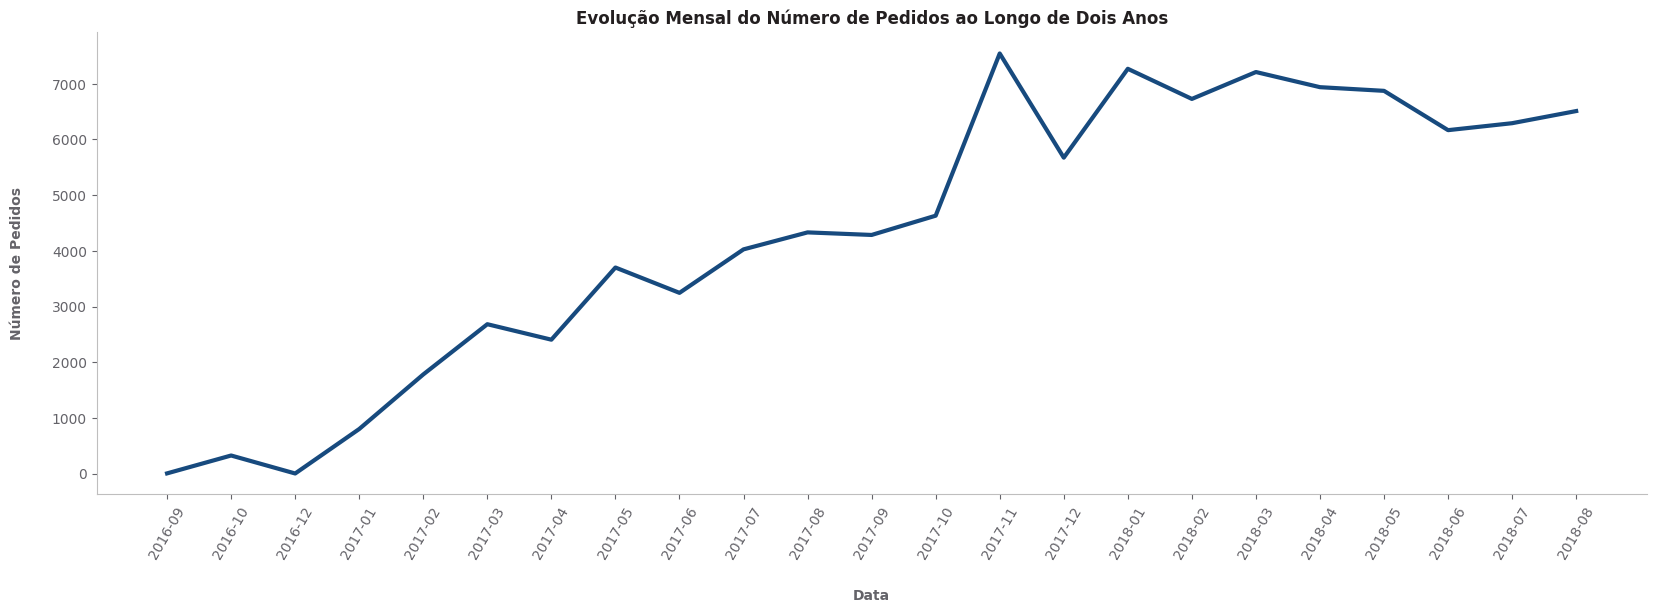

In [128]:
order_data['year_month'] = order_data['order_purchase_timestamp'].dt.strftime(date_format='%Y-%m')
orders_monthly = order_data.groupby(['year_month'])[['order_id']].count().rename(columns={'order_id': 'orders'}).reset_index().sort_values(by=['year_month'])
orders_monthly = orders_monthly.loc[~orders_monthly['year_month'].isin(['2018-09', '2018-10'])]

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Evolução Mensal do Número de Pedidos ao Longo de Dois Anos', fontweight='bold', color=CINZA1)
ax.plot(orders_monthly['year_month'], orders_monthly['orders'], color=AZUL1, linewidth=3)
ax.set_xlabel('Data', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_monthly['year_month'], labels=orders_monthly['year_month'], rotation=60)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

De forma geral, as vendas tendem a crescer ao longo dos anos, atingido seu pico em novembro de 2017. Ademais, de forma interessante, em 2017 as vendas caem de novembro para dezembro, subindo novamente de dezembro para janeiro de 2018.

### 3.10 Em quais horários são feitos mais pedidos?

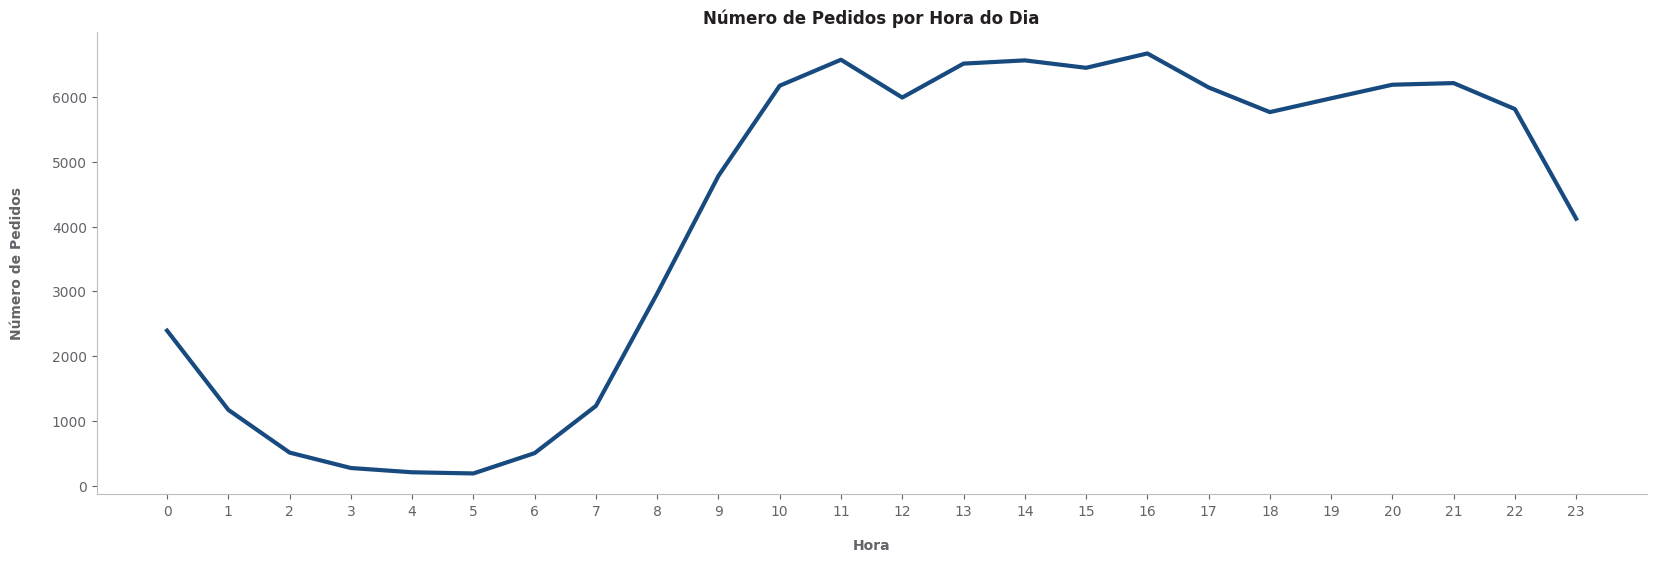

In [138]:
order_data['hour'] = order_data['order_purchase_timestamp'].dt.hour
orders_hourly = order_data.groupby(['hour'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['hour'], ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Número de Pedidos por Hora do Dia', color=CINZA1, fontweight='bold')
ax.plot(orders_hourly['hour'], orders_hourly['orders'], color=AZUL1, linewidth=3)
ax.set_xlabel('Hora', labelpad=15, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_hourly['hour'], labels=orders_hourly['hour'], color=CINZA1)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

É possível perceber que um maior número de pedidos é feito no período entre a manhã e a tarde, entre 10h e 16h. Os picos de venda ocorrem em volta das 16h e das 11h.

### 3.11 Em quais dias da semana são feitos mais pedidos?

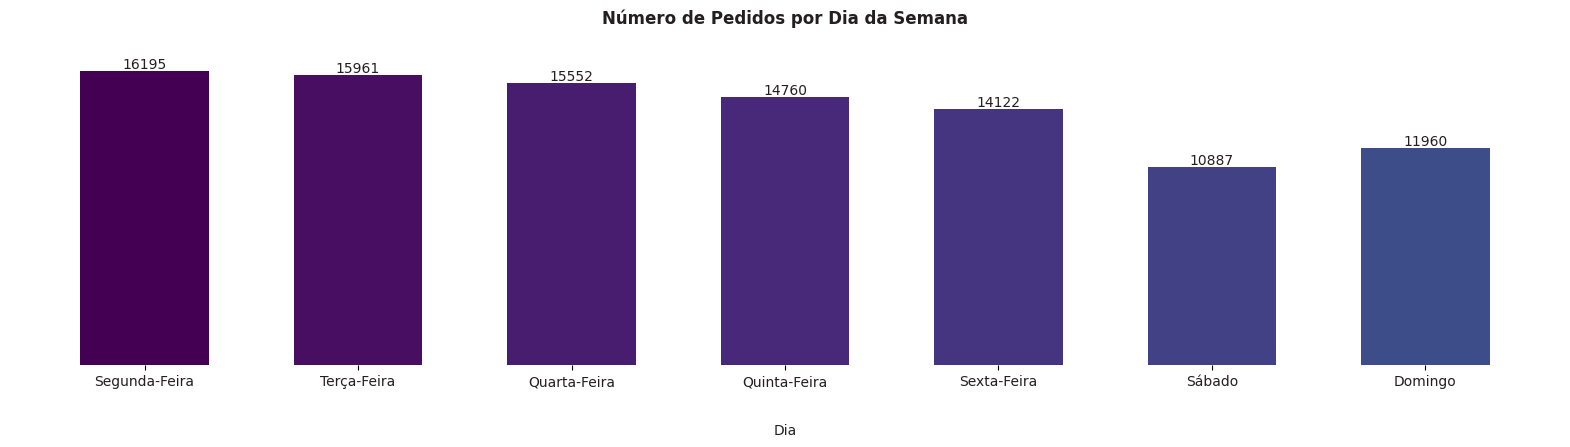

In [177]:
order_data['day'] = order_data['order_purchase_timestamp'].dt.dayofweek
orders_daily = order_data.groupby(['day'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['day'], ascending=True).reset_index()
orders_daily['day'] = orders_daily['day'].map({0: 'Segunda-Feira', 1: 'Terça-Feira', 2: 'Quarta-Feira', 3: 'Quinta-Feira', 4: 'Sexta-Feira', 5: 'Sábado', 6: 'Domingo'})

colors = plt.cm.viridis(np.linspace(0, 1, len(states_pmt)))
figure, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(x=orders_daily['day'], height=orders_daily['orders'], color=colors, width=0.6)
ax.bar_label(bars, color=CINZA1)
ax.set_title('Número de Pedidos por Dia da Semana', color=CINZA1, fontweight='bold', y=1.08)
ax.set_xlabel('Dia', labelpad=25, color=CINZA1)
ax.set_xticks(ticks=orders_daily['day'], labels=orders_daily['day'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

É possível observar que o número de pedidos tende a cair com o passar da semana, sendo segunda-feira o dia com mais pedidos.

### Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (pedidos e valor médio)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais os horários / dias da semana / meses do ano são feitas mais e menos compras?
8. Como se dá a evolução das compras ao longo do tempo?
9. Quais as categorias de item mais vendidas por região?
10. A região do país afeta o número de parcelas escolhido?
11. Em que estados estão concentrados mais e menos clientes?
12. Qual o número médio de itens por pedido?